# Titanic: Machine Learning from Disaster

## Module Imports

In [768]:
# First of all, let's import our important libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style = 'darkgrid')

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import StratifiedKFold

import string
import warnings

warnings.filterwarnings('ignore')

SEED = 42

%matplotlib inline

In [564]:
training_data.count()

PassengerId    889
Survived       889
Pclass         889
Age            889
SibSp          889
Parch          889
Fare           889
Sex_male       889
Embarked_Q     889
Embarked_S     889
dtype: int64

## Functions

In [565]:
# Create table for missing data analysis
def get_missing_data_table(df):
    """
    This function generates a dataframe with missing (null) value statistics for each column.
    
    Input: Pandas dataframe, dataset to be checked for missing values
    Output: Pandas dataframe, return dataframe with following information, 
            - each column in given dataset as index 
            - Total Count of non-null records
            - Missing (null) record count
            - Missing percentage of the records from the total record count
    """
    total = df.count()
    missing = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (round(df.isnull().sum()/df.isnull().count()*100,3))
    missing_data = pd.concat([total, missing, missing_percent], axis=1, keys=['Total_Count','Missing_Count', 'Missing %'])
    missing_data.sort_values(by='Missing %', ascending = False, inplace = True)
    return missing_data

In [589]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [592]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), log_scale = True):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    
    if (log_scale):
        plt.xscale('log')
        
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [606]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [664]:
# This function will stage the given dataset to a format which is suitable to input to machine learning model.

def stage_dataset_for_modeling(dataset, columns_to_drop, columns_to_categorical, normalize = False):
    return_dataset = dataset.copy()
    
    return_dataset.drop(columns=columns_to_drop, inplace = True)
    
    for column in columns_to_categorical:
        return_dataset[column] = pd.Categorical(return_dataset[column])
    
    return_dataset = pd.get_dummies(return_dataset, drop_first=True)
    
    if (normalize):
        scaler = StandardScaler()
        #TODO
        
    return return_dataset

## Data Imports & Preliminary Analysis

In [769]:
training_data = pd.read_csv('data\\train.csv')
test_data = pd.read_csv('data\\test.csv')

print('Training dataset size:', training_data.shape)
print('Test dataset size:', test_data.shape)
training_data.head()

Training dataset size: (891, 12)
Test dataset size: (418, 11)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [770]:
concat_df = pd.concat([training_data, test_data]).reset_index(drop=True)
concat_df.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
1304         1305       NaN       3            Spector, Mr. Woolf    male   
1305         1306       NaN       1  Oliva y Ocana, Dona. Fermina  female   
1306         1307       NaN       3  Saether, Mr. Simon Sivertsen    male   
1307         1308       NaN       3           Ware, Mr. Frederick    male   
1308         1309       NaN       3      Peter, Master. Michael J    male   

       Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
1304   NaN      0      0           A.5. 3236    8.0500   NaN        S  
1305  39.0      0      0            PC 17758  108.9000  C105        C  
1306  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307   NaN      0      0              359309    8.0500   NaN        S  
1308   NaN      1      1                2668   22.3583   NaN        C

In [771]:
print('Training dataset:', training_data.columns)
print('Test dataset:', test_data.columns)

Training dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Features in our dataset

**Variable Notes**

* PassengerId: Unique ID of the passenger.
* Survived: Whether passenger is survived or not, 1 = Survived, 0: No
* Pclass: Ticket class, A proxy for socio-economic status (SES). 1st = Upper, 2nd = Middle, 3rd = Lower
* Name: Name of the passenger
* Sex: Passenger sex, male or female
* Age: Age in years, is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp: # of siblings / spouses aboard the Titanic, Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: # of parents / children aboard the Titanic, Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number
* Fare: Passenger fare 
* Cabin: Cabin number
* Embarked: Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.









In [571]:
print(training_data.info())
training_data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId  Survived  Pclass  \
48           49         0       3   
49           50         0       3   
7             8         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
48                            Samaan, Mr. Youssef    male   NaN      2      0   
49  Arnold-Franchi, Mrs. Josef (Josefine Franchi)  female  18.0      1      0   
7                  Palsson, Master. Gosta Leonard    male   2.0      3      1   

    Ticket     Fare Cabin Embarked  
48    2662  21.6792   NaN        C  
49  349237  17.8000   NaN        S  
7   349909  21.0750   NaN        S

In [572]:
print(test_data.info())
test_data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


PassengerId  Pclass                            Name     Sex   Age  SibSp  \
412         1304       3  Henriksson, Miss. Jenny Lovisa  female  28.0      0   
334         1226       3                   Cor, Mr. Ivan    male  27.0      0   
375         1267       1        Bowen, Miss. Grace Scott  female  45.0      0   

     Parch    Ticket      Fare Cabin Embarked  
412      0    347086    7.7750   NaN        S  
334      0    349229    7.8958   NaN        S  
375      0  PC 17608  262.3750   NaN        C

### Null/Bad Data Analysis

In [621]:
# Let's create list for both datasets, so we can loop over to perform similar statistics on both datasets.
combined_df = [training_data, test_data]

training_data.name = 'Training Set'
test_data.name = 'Test Set'
concat_df.name = 'All Dataset'

In [622]:
# First, we will see how many values missings in each column

for df in combined_df:
    print('\n', df.name, '\n', get_missing_data_table(df))


 Training Set 
              Total_Count  Missing_Count  Missing %
Cabin                204            687     77.104
Age                  714            177     19.865
Embarked             889              2      0.224
PassengerId          891              0      0.000
Survived             891              0      0.000
Pclass               891              0      0.000
Name                 891              0      0.000
Sex                  891              0      0.000
SibSp                891              0      0.000
Parch                891              0      0.000
Ticket               891              0      0.000
Fare                 891              0      0.000

 Test Set 
              Total_Count  Missing_Count  Missing %
Cabin                 91            327     78.230
Age                  332             86     20.574
Fare                 417              1      0.239
PassengerId          418              0      0.000
Pclass               418              0      0.000
N

As can be seen from the table above, we have missing values for 'Age', 'Cabin' and 'Embarked' features. 

* Most of the values in the 'Cabin' feature is missing. So, probably worth dropping that field altogether. This needs to be investigated bit further with the cabin details.

* For the missing ages, I will use people's title details (whether Mr., Mrs., etc.) and get the mean value. 

* For the Embarked field, since it is just for two records, we replace them with most common occurrence.

## Minimum Viable Product (Lean Model) 

In [617]:
training_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [630]:
# Fill missing age values by the median age
median_age = training_data['Age'].median()
training_data['Age'].fillna(value = median_age, inplace = True)
test_data['Age'].fillna(value = median_age, inplace = True)
print(f'Filled missing values in training and test dataset with median age of {median_age}.')

Filled missing values in training and test dataset with median age of 28.0.


In [619]:
# Let's drop the cabin feature altogether as it has 77% of the data missing.
training_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [624]:
# Let's remove those two entries with missing Embarked field in the training set.
training_data.dropna(axis = 0, inplace=True)
training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [631]:
# Let's populate the missing fare value with the median fare from the training dataset.
median_fare = training_data['Fare'].median()

test_data['Fare'].fillna(value = median_fare, inplace = True)

In [580]:
# Name and Ticket field contains complicated data format. So, we drop those columns from the training and testing dataset.
cols_to_drop = ['Name', 'Ticket']
for dataset in combined_df:
    dataset.drop(columns=cols_to_drop, inplace = True)

training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [581]:
# Let's now use one-hot encoding for categorical features.
for dataset in combined_df:
    dataset['Embarked'] = pd.Categorical(dataset['Embarked'])
    dataset['Sex'] = pd.Categorical(dataset['Sex'])

training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 57.5 KB


In [582]:
# For one-hot encoding, we use pd.get_dummies function
training_data = pd.get_dummies(training_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

In [626]:
training_data.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

In [583]:
# Let's build our training and testing datasets for model.
X_train = training_data.drop(columns=['PassengerId', 'Survived'])
y_train = training_data['Survived']

X_test = test_data.drop(columns = ['PassengerId'])

print('Training dataset:', X_train.shape)
print('Testing dataset:', X_test.shape)

Training dataset: (889, 8)
Testing dataset: (418, 8)


In [584]:
# Let's train our first model.
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8268258426966291

In [ ]:
# So we can see that our basic model performed relatively ok with 82.6% accuracy with 10-fold cross validation.

In [585]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

pid = test_data['PassengerId']
result_frame = pd.DataFrame(data={'PassengerID': pid, 'Survived': y_pred})
result_frame.to_csv('test.csv', index = False)

result_frame.head()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


PassengerID  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

<module 'matplotlib.pyplot' from 'C:\\Users\\d800642\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

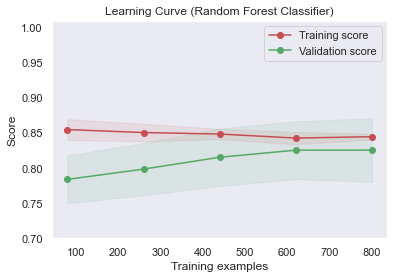

In [590]:
# plot learning curve
plot_learning_curve(classifier, 'Learning Curve (Random Forest Classifier)', 
                    X_train, y_train, ylim = (0.7, 1.01), cv = 10, n_jobs=-1)

**Learning curves in a nutshell:**

* Learning curves allow us to diagnose if there is overfitting or underfitting.

* When the model overfits, it means that it performs well on the training set, but not not on the validation set. Accordingly, the model is not able to generalize to unseen data. If the model is overfitting, the learning curve will present a gap between the training and validation scores. Two common solutions for overfitting are reducing the complexity of the model and/or collect more data.

* On the other hand, underfitting means that the model is not able to perform well in either training or validations sets. In those cases, the learning curves will converge to a low score value. When the model underfits, gathering more data is not helpful because the model is already not being able to learn the training data. Therefore, the best approaches for these cases are to improve the model (e.g., tuning the hyperparameters) or to improve the quality of the data (e.g., collecting a different set of features).

**Discussion of our results:**

* The model doesn't overfit. As we can see, the curves converge and no gap between the training and the validation score exists in the last points of the curve.

* The model underfits. Our final score is about 0.786. Although our model does better predictions than a flip-a-coin strategy, it is still far from being an 'intelligent' model. For now, it's just an 'artificial' model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Paralle

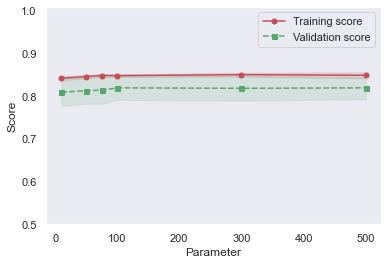

In [596]:
# plot validation curve

plot_validation_curve(estimator=classifier, title = 'Validation Curve (Random Forest Classifier)', 
                      X = X_train, y = y_train, param_name='n_estimators', param_range=[10, 50, 75, 100, 300, 500],
                      ylim = [0.5, 1.01], log_scale=False                  
                     )

**Validation curves in a nutshell:**

* Validation curves are a tool that we can use to improve the performance of our model. It counts as a way of tuning our hyperparameters.
* They are different from the learning curves. Here, the goal is to see how the model parameter impacts the training and validation scores. This allow us to choose a different value for the parameter, to improve the model.
* Once again, if there is a gap between the training and the validation score, the model is probably overfitting. In contrast, if there is no gap but the score value is low, we can say that the model underfits.

**Discussion of our results:**

* The figure shows that there is no huge difference in model's performance with respect to number of estimators in our random forest classifier. From the graph, it appears n_estimators = 100 would be the reasonable value to use. 

**Remarks on MVP Approach - Lean model**

This simple model with lean dataset performs with 0.77511 accuracy on the Kaggle leaderboard and provide 0.82682 accuracy with 10-fold cross validation dataset. 

## Feature Engineering 

Next thing to do in our lean approach is based on the performance of our MVP model, improve it by iteration. This can be done by:

* Improving the way how we handled missing data. In our lean approach we decided to replace missing data by a unique value, but now we can go deeper and search for a better imputation strategy.

* Exploring data to understand which features can have impact in the model and how they can be manipulated to boost that impact.

* Building new features that can increase the predictive power of our model.

* This will lead us to a heavy data analysis process, which aims to improve model's performance just by the data quality side. In other words, we will not change our learning algorithm neither we will try to improve its parameters. We will only try to improve the performance of our model by enriching our data.


This is called, Feature engineering, and involves looking into underlying statistics of the data in the given features and extracting additional features. This involves few steps:

* Binning
* Combining features (interactions)
* Extract additional information out of existing features

In [772]:
# Let's re-import the clean dataset again from the scratch, because in the lean model development, we have removed some of the
# required features that we want in this detailed feature engineering approach. 

# NOTE, we will work on missing/null values in the dataset again, but this time it will be more specific and based on some
# underlying statistics, instead of just replacing or removing the data. 

training_data = pd.read_csv('data\\train.csv')
test_data = pd.read_csv('data\\test.csv')

# Let's create list for both datasets, so we can loop over to perform similar statistics on both datasets.
combined_df = [training_data, test_data]

training_data.name = 'Training Set'
test_data.name = 'Test Set'
concat_df.name = 'All Dataset'

print('Training dataset size:', training_data.shape)
print('Test dataset size:', test_data.shape)
training_data.head()

Training dataset size: (891, 12)
Test dataset size: (418, 11)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### New Field: Title

Name feature has title field, which can be extracted and be used as a new feature. This allows us to understand different categories of people on the ship. 

In [773]:
for dataset in combined_df:
    dataset['Title'] = dataset['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()

title_values = pd.concat([test_data['Title'], training_data['Title']], axis=0)
title_values.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Jonkheer          1
Dona              1
Don               1
Sir               1
Lady              1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [774]:
# From the title categories, it seems we have some common ones, which can be combined on to groups. 
# Dr, Rev, Col, Major, Sir, Capt - Special
# Mr, Don, Jonkheer - Men
# Miss, Mlle, Ms, Lady - Girl
# Mrs, Mme, the Countess, Dona - Women
# Master - Kids

for dataset in combined_df:
    dataset['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Sir', 'Capt'], value = 'Special', inplace = True)
    dataset['Title'].replace(to_replace = ['Mr', 'Don', 'Jonkheer'], value = 'Men', inplace = True)
    dataset['Title'].replace(to_replace = ['Miss', 'Mlle', 'Ms', 'Lady'], value = 'Girl', inplace = True)
    dataset['Title'].replace(to_replace = ['Mrs', 'Mme', 'the Countess', 'Dona'], value = 'Women', inplace = True)
    dataset['Title'].replace(to_replace = ['Master'], value = 'Kids', inplace = True) 

In [775]:
# Another thing...Title = 'Girl' (which is class, 'Miss', 'Mlle', 'Ms', 'Lady') might have some kids under 10. 
# They should be considered as children (like Master) and assigned to Title class, 'Kids'. 

for dataset in combined_df:
    dataset.loc[(dataset['Title'] == 'Girl') & (dataset['Age'] < 10), 'Title'] = 'Kids'

In [776]:
test_data['Title'].value_counts()

Men        240
Women       73
Girl        70
Kids        30
Special      5
Name: Title, dtype: int64

### Filling Age - Not so bad with easy approach.

In [671]:
# Fill missing age values by the median age of the whole training set
median_age = training_data['Age'].median()
training_data['Age'].fillna(value = median_age, inplace = True)
test_data['Age'].fillna(value = median_age, inplace = True)
print(f'Filled missing values in training and test dataset with median age of {median_age}.')

Filled missing values in training and test dataset with median age of 28.0.


### Filling Age - Based on the stats in Title grouping

Title
Girl       26.420833
Kids        4.502576
Men        32.401250
Special    46.833333
Women      35.763636
Name: Age, dtype: float64


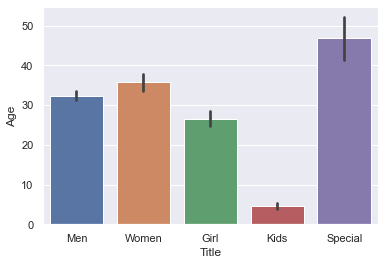

In [777]:
# Let's see how the age relationship with Title
sns.barplot(x = training_data['Title'], y = training_data['Age'])
print(mean_ages)

Bar plot gives us an estimate of central tendency for a numeric variable (height of each rectangle) and an indication of the uncertainty around that estimate (error bars in black).

Apart from 'Special' category, which have a larger error bar, the mean value seems to accurately represent the data of all the other features. This validates our approach.

Here you can find a short and sweet intro to error bars interpretation - https://www.biologyforlife.com/interpreting-error-bars.html

In [778]:
# Instead of using the median of the whole dataset, we now use median age of the respective Title category..
training_data.groupby(by = ['Title'])['Age'].median()

# replace Age data with median value
for dataset in combined_df:
    for title_val in dataset['Title']:
        # we use the statistics of training data to replace the missing values in test data. It is not correct to use 
        # test data statistics to fill those values. 
        
        median_age = training_data.groupby(by = ['Title'])['Age'].median()[title_val]
        dataset.loc[(dataset['Title'] == title_val) & (dataset['Age'].isnull()), 'Age'] = median_age                        

In [686]:
# Let's populate the missing fare value with the median fare from the training dataset.
median_fare = X_train['Fare'].median()

X_test['Fare'].fillna(value = median_fare, inplace = True)
X_test.isnull().sum()

Pclass            0
Age              86
SibSp             0
Parch             0
Fare              0
Sex_male          0
Embarked_Q        0
Embarked_S        0
Title_Kids        0
Title_Men         0
Title_Special     0
Title_Women       0
dtype: int64

In [687]:
# Let's try the improvment 
X_train = stage_dataset_for_modeling(training_data,
                                     columns_to_drop=['Name', 'Ticket', 'PassengerId', 'Survived', 'Cabin'],
                                     columns_to_categorical=['Sex', 'Embarked', 'Title']
                                    )
X_train.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0       3  22.0      1      0   7.2500         1           0           1   
1       1  38.0      1      0  71.2833         0           0           0   
2       3  26.0      0      0   7.9250         0           0           1   
3       1  35.0      1      0  53.1000         0           0           1   
4       3  35.0      0      0   8.0500         1           0           1   

   Title_Kids  Title_Men  Title_Special  Title_Women  
0           0          1              0            0  
1           0          0              0            1  
2           0          0              0            0  
3           0          0              0            1  
4           0          1              0            0

In [688]:
X_test = stage_dataset_for_modeling(test_data,
                                     columns_to_drop=['Name', 'Ticket', 'PassengerId', 'Cabin'],
                                     columns_to_categorical=['Sex', 'Embarked', 'Title']
                                    )
X_test.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0       3  34.5      0      0   7.8292         1           1           0   
1       3  47.0      1      0   7.0000         0           0           1   
2       2  62.0      0      0   9.6875         1           1           0   
3       3  27.0      0      0   8.6625         1           0           1   
4       3  22.0      1      1  12.2875         0           0           1   

   Title_Kids  Title_Men  Title_Special  Title_Women  
0           0          1              0            0  
1           0          0              0            1  
2           0          1              0            0  
3           0          1              0            0  
4           0          0              0            1

In [689]:
y_train = training_data['Survived']

In [690]:
# Let's train our second model.
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8316354556803995

## Exploratory Data Analysis

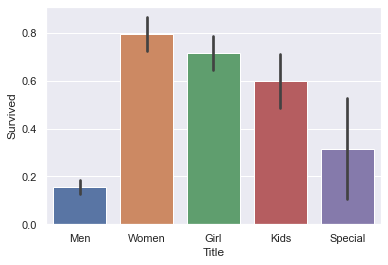

In [711]:
sns.barplot(x = 'Title', y = 'Survived', data = training_data)

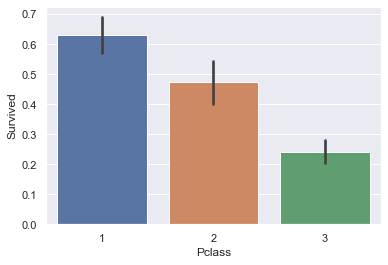

In [712]:
sns.barplot(x = 'Pclass', y = 'Survived', data = training_data)

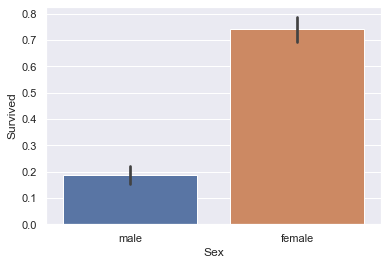

In [713]:
sns.barplot(x = 'Sex', y = 'Survived', data = training_data)

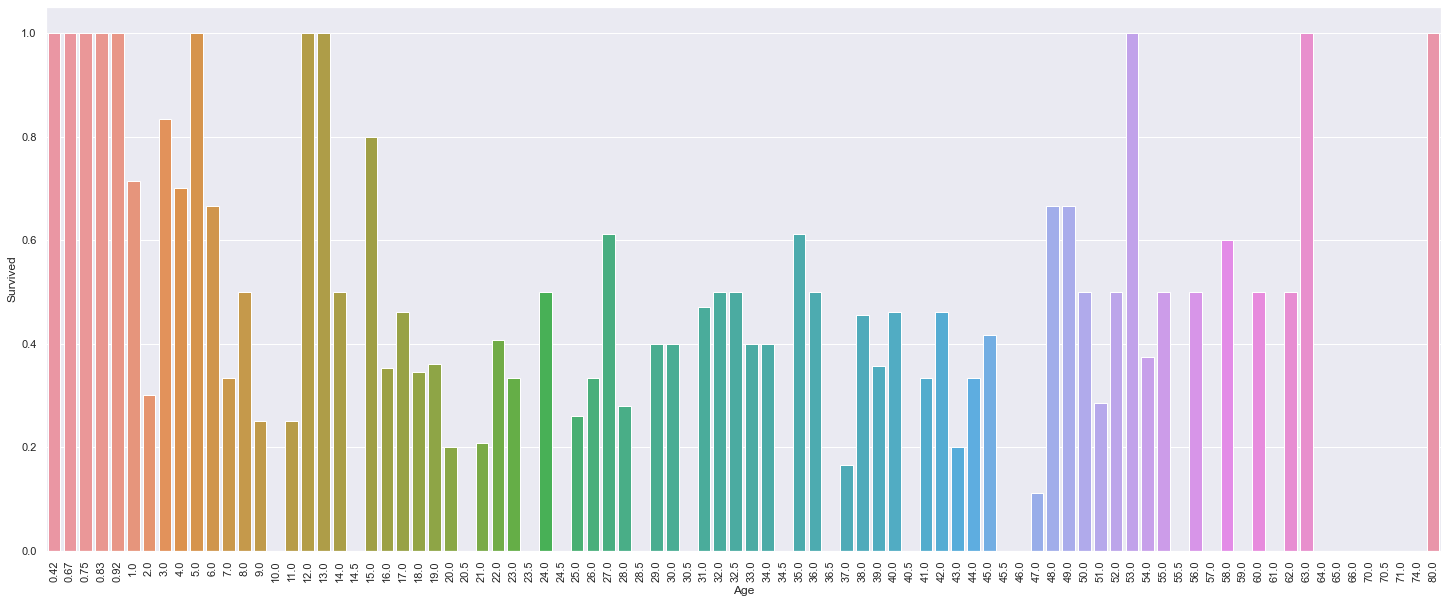

In [716]:
plt.figure(figsize=[25, 10])
sns.barplot(x = 'Age', y = 'Survived', data = training_data, ci = None)
plt.xticks(rotation = 90)
plt.show()

#### Is there any benefit in "binning" the Age feature?

In [719]:
# This is without binning the age feature
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8316354556803995

In [720]:
X_train['Age_binned'] = pd.cut(X_train['Age'], bins = [0, 12, 50, 105], labels = ['Child', 'Adult', 'Elder'])
X_test['Age_binned'] = pd.cut(X_test['Age'], bins = [0, 12, 50, 105], labels = ['Child', 'Adult', 'Elder'])

In [722]:
X_train.drop(columns=['Age'], inplace = True)
X_test.drop(columns=['Age'], inplace = True)

In [727]:
X_train = pd.get_dummies(data = X_train, drop_first=True)
X_test = pd.get_dummies(data = X_test, drop_first=True)

    

In [728]:
# This is after binning the age feature
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8271660424469414

In [ ]:
# So, it seems that binning has not improved the accuracy much. 

#### Does Embarked port matters much?

In [730]:
X_train.drop(columns=['Embarked_Q', 'Embarked_S'], inplace = True)
X_test.drop(columns=['Embarked_Q', 'Embarked_S'], inplace = True)

In [731]:
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8282771535580522

In [ ]:
# Infact, getting rid of embarked has actually improved the score a little bit. 

In [732]:
X_train.head()

Pclass  SibSp  Parch     Fare  Sex_male  Title_Kids  Title_Men  \
0       3      1      0   7.2500         1           0          1   
1       1      1      0  71.2833         0           0          0   
2       3      0      0   7.9250         0           0          0   
3       1      1      0  53.1000         0           0          0   
4       3      0      0   8.0500         1           0          1   

   Title_Special  Title_Women  Age_binned_Adult  Age_binned_Elder  
0              0            0                 1                 0  
1              0            1                 1                 0  
2              0            0                 1                 0  
3              0            1                 1                 0  
4              0            0                 1                 0

Pclass              0
SibSp               0
Parch               0
Fare                0
Sex_male            0
Title_Kids          0
Title_Men           0
Title_Special       0
Title_Women         0
Age_binned_Adult    0
Age_binned_Elder    0
dtype: int64

### Polynomial features and feature selection

In [781]:
X_train = stage_dataset_for_modeling(training_data,
                                     columns_to_drop=['Name', 'Ticket', 'PassengerId', 'Survived', 'Cabin'],
                                     columns_to_categorical=['Sex', 'Embarked', 'Title']
                                    )
X_train.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0       3  22.0      1      0   7.2500         1           0           1   
1       1  38.0      1      0  71.2833         0           0           0   
2       3  26.0      0      0   7.9250         0           0           1   
3       1  35.0      1      0  53.1000         0           0           1   
4       3  35.0      0      0   8.0500         1           0           1   

   Title_Kids  Title_Men  Title_Special  Title_Women  
0           0          1              0            0  
1           0          0              0            1  
2           0          0              0            0  
3           0          0              0            1  
4           0          1              0            0

In [783]:
X_test = stage_dataset_for_modeling(test_data,
                                     columns_to_drop=['Name', 'Ticket', 'PassengerId', 'Cabin'],
                                     columns_to_categorical=['Sex', 'Embarked', 'Title']
                                    )
X_test.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0       3  34.5      0      0   7.8292         1           1           0   
1       3  47.0      1      0   7.0000         0           0           1   
2       2  62.0      0      0   9.6875         1           1           0   
3       3  27.0      0      0   8.6625         1           0           1   
4       3  22.0      1      1  12.2875         0           0           1   

   Title_Kids  Title_Men  Title_Special  Title_Women  
0           0          1              0            0  
1           0          0              0            1  
2           0          1              0            0  
3           0          1              0            0  
4           0          0              0            1

In [786]:
X_test.loc[X_test['Fare'].isnull(), 'Fare'] = X_train['Fare'].median()
X_test.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Kids       0
Title_Men        0
Title_Special    0
Title_Women      0
dtype: int64

In [787]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train_transformed = scalar.fit_transform(X_train)
X_test_transformed = scalar.transform(X_test)

In [788]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)

In [789]:
X_train_poly.shape

(891, 91)

In [762]:
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=150,
                                           max_depth=10,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(classifier, X = X_train_poly, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8362047440699125

In [755]:
classifier.fit(X_train_poly, y_train)
y_pred = classifier.predict(X_test_poly)

pid = test_data['PassengerId']
result_frame = pd.DataFrame(data={'PassengerID': pid, 'Survived': y_pred})
result_frame.to_csv('test.csv', index = False)

result_frame.head()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


PassengerID  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0

### Univariate Feature Selection

In [756]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [790]:
classifier = RandomForestClassifier(criterion='gini', 
                                           n_estimators=150,
                                           max_depth=10,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=False,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

print('With all poly features:',
      cross_val_score(classifier, X = X_train_poly, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean())

print('With basic features:',
      cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean())

With all poly features: 0.8361797752808989
With basic features: 0.8384019975031209


In [791]:
# Now, we will implement the model with feature selection

mean_score = []
std_score = []

for i in range(1, X_train_poly.shape[1]+1):
    # select i number of features from our polynomial dataset
    select = SelectKBest(score_func=chi2, k = i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)
    
    # now we model with those features
    classifier.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(classifier, X = X_train_poly_selected, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy')
    mean_score.append(scores.mean())
    std_score.append(scores.std())
    print(f'CV Accuracy: No of features {i}\tMean Score: {scores.mean()}\tStd. Score: {scores.std()}') 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 1	Mean Score: 0.7452933832709114	Std. Score: 0.03349922947809357


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


CV Accuracy: No of features 2	Mean Score: 0.7845193508114856	Std. Score: 0.03394837211572932


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 3	Mean Score: 0.7845193508114856	Std. Score: 0.03394837211572932


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 4	Mean Score: 0.7845193508114856	Std. Score: 0.03394837211572932


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 5	Mean Score: 0.790087390761548	Std. Score: 0.0295333492067837


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


CV Accuracy: No of features 6	Mean Score: 0.790087390761548	Std. Score: 0.0295333492067837


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


CV Accuracy: No of features 7	Mean Score: 0.790087390761548	Std. Score: 0.0295333492067837


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 8	Mean Score: 0.790087390761548	Std. Score: 0.0295333492067837


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 9	Mean Score: 0.791210986267166	Std. Score: 0.0295898164719672


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 10	Mean Score: 0.791210986267166	Std. Score: 0.0295898164719672


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 11	Mean Score: 0.7889637952559301	Std. Score: 0.029433913402306392


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 12	Mean Score: 0.7889637952559301	Std. Score: 0.029433913402306392


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 13	Mean Score: 0.7777528089887641	Std. Score: 0.028943436385199982


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 14	Mean Score: 0.7822721598002497	Std. Score: 0.027563100364006127


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 15	Mean Score: 0.7845318352059925	Std. Score: 0.03672095081501831


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished


CV Accuracy: No of features 16	Mean Score: 0.8069787765293384	Std. Score: 0.032347085440761814


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished


CV Accuracy: No of features 17	Mean Score: 0.8148314606741573	Std. Score: 0.03176736547788278


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished


CV Accuracy: No of features 18	Mean Score: 0.8170786516853934	Std. Score: 0.035788942115269125


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 19	Mean Score: 0.8136953807740325	Std. Score: 0.03663007512600682


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 20	Mean Score: 0.8137078651685392	Std. Score: 0.03515184296922876


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 21	Mean Score: 0.8125717852684143	Std. Score: 0.0313840917378944


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 22	Mean Score: 0.8125842696629213	Std. Score: 0.03249037226413991


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 23	Mean Score: 0.8136953807740325	Std. Score: 0.033004075985973574


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 24	Mean Score: 0.8114606741573034	Std. Score: 0.034293784106303515


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 25	Mean Score: 0.8103370786516855	Std. Score: 0.03147992990173028


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 26	Mean Score: 0.8272034956304619	Std. Score: 0.04507286405640403


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 27	Mean Score: 0.8316853932584269	Std. Score: 0.04186595860707879


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 28	Mean Score: 0.826067415730337	Std. Score: 0.03981017957353445


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 29	Mean Score: 0.8361797752808988	Std. Score: 0.04701357761585892


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 30	Mean Score: 0.8373033707865168	Std. Score: 0.04834543046021031


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 31	Mean Score: 0.8372908863920099	Std. Score: 0.04892322007777359


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 32	Mean Score: 0.8372908863920101	Std. Score: 0.0478798925850787


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 33	Mean Score: 0.8372908863920099	Std. Score: 0.04627081251425443


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 34	Mean Score: 0.8395380774032459	Std. Score: 0.047018425867451544


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 35	Mean Score: 0.8372908863920099	Std. Score: 0.050447769881409595


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 36	Mean Score: 0.8417727840199749	Std. Score: 0.052491622129149186


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 37	Mean Score: 0.8395255930087391	Std. Score: 0.05264425657452154


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 38	Mean Score: 0.844019975031211	Std. Score: 0.041463837426567535


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 39	Mean Score: 0.8395255930087391	Std. Score: 0.04515735788708195


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 40	Mean Score: 0.838414481897628	Std. Score: 0.04597824871326832


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 41	Mean Score: 0.8417727840199749	Std. Score: 0.04441442266198601


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 42	Mean Score: 0.845143570536829	Std. Score: 0.04934186505179783


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 43	Mean Score: 0.838414481897628	Std. Score: 0.04786172494983279


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 44	Mean Score: 0.842896379525593	Std. Score: 0.04836910087672648


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 45	Mean Score: 0.8395255930087391	Std. Score: 0.04571307959164201


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 46	Mean Score: 0.8417727840199751	Std. Score: 0.04525913114513171


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 47	Mean Score: 0.8373158551810237	Std. Score: 0.049824855611698096


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 48	Mean Score: 0.8417727840199749	Std. Score: 0.04441442266198601


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 49	Mean Score: 0.842896379525593	Std. Score: 0.053097149890705166


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 50	Mean Score: 0.8451435705368289	Std. Score: 0.04985096108601741


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 51	Mean Score: 0.8462796504369537	Std. Score: 0.048050682912137085


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 52	Mean Score: 0.8462671660424469	Std. Score: 0.045127527172523114


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 53	Mean Score: 0.8440199750312111	Std. Score: 0.04742874545504749


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 54	Mean Score: 0.845143570536829	Std. Score: 0.050605003041342835


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 55	Mean Score: 0.8440199750312111	Std. Score: 0.051266226246069295


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 56	Mean Score: 0.8395255930087391	Std. Score: 0.049683253756424545


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished


CV Accuracy: No of features 57	Mean Score: 0.8417727840199749	Std. Score: 0.04977577407228844


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 58	Mean Score: 0.8395380774032459	Std. Score: 0.05088685910062156


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 59	Mean Score: 0.8429088639200998	Std. Score: 0.046449331900556445


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 60	Mean Score: 0.8417852684144819	Std. Score: 0.055710008474747844


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 61	Mean Score: 0.8395380774032459	Std. Score: 0.05283433662653199


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 62	Mean Score: 0.842896379525593	Std. Score: 0.05237899688712372


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 63	Mean Score: 0.835043695380774	Std. Score: 0.04730633610794499


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 64	Mean Score: 0.8350561797752809	Std. Score: 0.05351146450745964


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 65	Mean Score: 0.8417852684144819	Std. Score: 0.05705349303492178


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 66	Mean Score: 0.8372908863920099	Std. Score: 0.05289112267721911


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 67	Mean Score: 0.844019975031211	Std. Score: 0.05319981814961731


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 68	Mean Score: 0.8440324594257179	Std. Score: 0.050967287904189536


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 69	Mean Score: 0.8350686641697879	Std. Score: 0.05250023963436637


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


CV Accuracy: No of features 70	Mean Score: 0.8429088639200998	Std. Score: 0.05422425552610105


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 71	Mean Score: 0.840661672908864	Std. Score: 0.053246375791684536


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 72	Mean Score: 0.8406866416978775	Std. Score: 0.05453935876404014


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 73	Mean Score: 0.8429338327091136	Std. Score: 0.05387742966300951


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 74	Mean Score: 0.8406866416978778	Std. Score: 0.06004810641906324


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 75	Mean Score: 0.8384269662921348	Std. Score: 0.05740198608554261


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 76	Mean Score: 0.8406866416978775	Std. Score: 0.05407442075494555


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 77	Mean Score: 0.8440324594257179	Std. Score: 0.047902738855411665


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 78	Mean Score: 0.8373158551810237	Std. Score: 0.052777914729414455


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 79	Mean Score: 0.8384144818976278	Std. Score: 0.05043052733436793


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 80	Mean Score: 0.8406616729088638	Std. Score: 0.05180425186912653


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 81	Mean Score: 0.8350811485642946	Std. Score: 0.05315318014129111


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 82	Mean Score: 0.8350686641697879	Std. Score: 0.05152938785631263


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 83	Mean Score: 0.8429088639200998	Std. Score: 0.049857615443096845


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 84	Mean Score: 0.8395380774032459	Std. Score: 0.0525948456558321


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 85	Mean Score: 0.8350561797752809	Std. Score: 0.04933799855334467


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 86	Mean Score: 0.8373158551810237	Std. Score: 0.05253816656470269


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 87	Mean Score: 0.8440324594257179	Std. Score: 0.05362282299135721


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 88	Mean Score: 0.8361922596754058	Std. Score: 0.04930809403150496


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 89	Mean Score: 0.838414481897628	Std. Score: 0.0523949690796895


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


CV Accuracy: No of features 90	Mean Score: 0.8373033707865168	Std. Score: 0.04808358669211493


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


CV Accuracy: No of features 91	Mean Score: 0.8361797752808989	Std. Score: 0.0535421259156727


In [798]:
np.array(mean_score).max()

0.8462796504369537

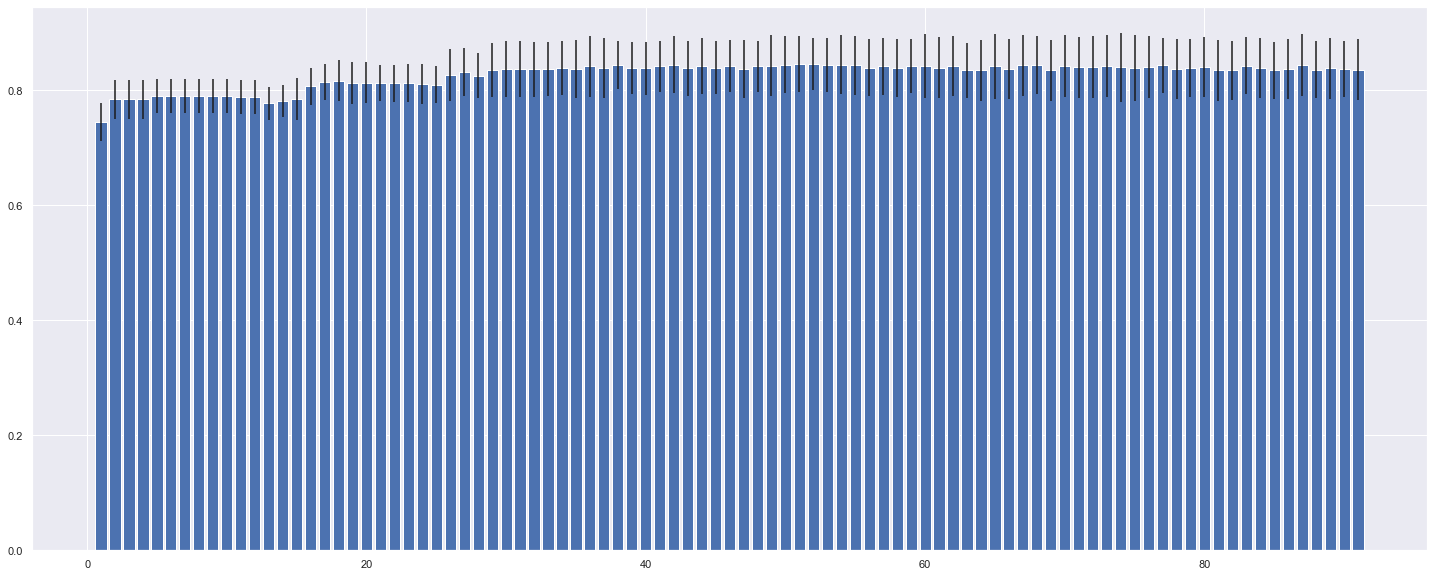

In [797]:
plt.figure(figsize = [25, 10])
plt.bar(x = np.arange(1,92), height=mean_score, yerr = std_score)
plt.show()

#### Embarked

In [400]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

training_data['Embarked'] = pd.DataFrame(imputer.fit_transform(np.array(training_data['Embarked']).reshape(-1,1)))
test_data['Embarked'] = pd.DataFrame(imputer.transform(np.array(test_data['Embarked']).reshape(-1,1)))

In [401]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [402]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

#### Cabin

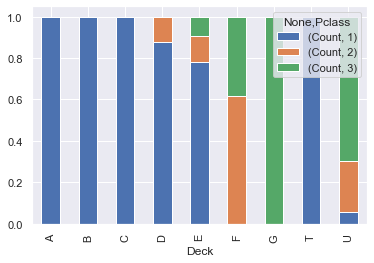

In [403]:
# We create a new column named 'Deck' by extracting first letter from the 'Cabin' feature. If the 'Cabin' value is null, then 
# we assign 'U', which stands for Undefined. 

for dataset in combined_df:
    dataset['Deck'] = dataset['Cabin'].str[0:1]
    dataset['Deck'].fillna(value='U', inplace = True)
    
deck_df = training_data.groupby(by= ['Deck', 'Pclass']).count()[['Name']].rename(columns = {'Name': 'Count'})
deck_df = deck_df.fillna(value = 0).unstack()

deck_df['Total'] = deck_df.sum(axis = 1)

norm_deck_df = deck_df.loc[:, ('Count',[1, 2, 3])].div(deck_df['Total'], axis = 0)

norm_deck_df.plot(kind = 'bar', stacked = True)

In [404]:
deck_df = training_data.groupby(by= ['Deck', 'Pclass']).count()[['Name']].rename(columns = {'Name': 'Count'})
deck_df

Count
Deck Pclass       
A    1          15
B    1          47
C    1          59
D    1          29
     2           4
E    1          25
     2           4
     3           3
F    2           8
     3           5
G    3           4
T    1           1
U    1          40
     2         168
     3         479

Text(0, 0.5, 'Survival Rate')

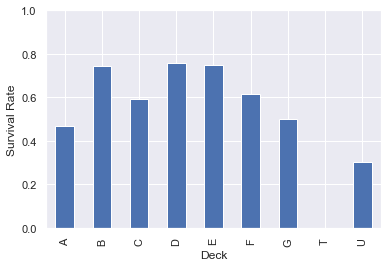

In [405]:
# Let's see the survival rate for each cabin class
training_data.groupby(by = ['Deck']).mean()['Survived'].plot(kind = 'bar')
plt.ylim([0,1])
plt.ylabel('Survival Rate')

* A, B and C decks are labeled as ABC because all of them have only 1st class passengers
* D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
* F and G decks are labeled as FG because of the same reason above
* M deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.
* T deck is similar to deck A, B and C. So we assign that to ABC.

In [406]:
for dataset in combined_df:
    dataset['Deck'].replace(to_replace = ['A', 'B', 'C'], value = 'ABC', inplace = True)
    dataset['Deck'].replace(to_replace = ['D', 'E'], value = 'DE', inplace = True)
    dataset['Deck'].replace(to_replace = ['F', 'G'], value = 'FG', inplace = True)
    dataset['Deck'].replace(to_replace = ['T'], value = 'ABC', inplace = True)

print(training_data['Deck'].value_counts())
print(test_data['Deck'].value_counts())

U      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64
U      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64


In [407]:
# Basic label encoding which we not gonna use in this case.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

training_data['Deck'] = encoder.fit_transform(training_data['Deck'])
test_data['Deck'] = encoder.transform(test_data['Deck'])

In [408]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Deck             0
dtype: int64

#### Fare

In [409]:
# There is missing value in Fare column. First, we check the details of that record.
test_data[test_data['Fare'].isnull()]

# Looking at the details of this record, we can see that, this passenger was male in third class with no family.
# So, we use the median of those people to fill this missing fare.

median_fare = training_data[(training_data['Pclass']==3) &
              (training_data['SibSp'] ==0) & 
              (training_data['Parch'] ==0) & 
              (training_data['Sex'] == 'male')]['Fare'].median()

test_data['Fare'].fillna(value = median_fare, inplace = True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Deck             0
dtype: int64

### Target Distribution

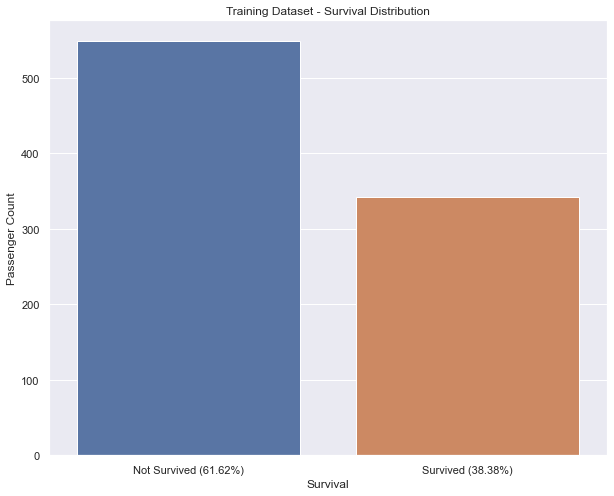

In [410]:
survived = training_data['Survived'].value_counts()[1]
not_survived = training_data['Survived'].value_counts()[0]

survived_percent = survived/training_data.shape[0]*100
not_survived_percent = not_survived/training_data.shape[0]*100

plt.figure(figsize=[10, 8])
sns.countplot(training_data['Survived'])

plt.xlabel('Survival')
plt.ylabel('Passenger Count')

plt.xticks(ticks = [0, 1], labels=['Not Survived ({0:.2f}%)'.format(not_survived_percent), 
                                   'Survived ({0:.2f}%)'.format(survived_percent)])

plt.title('Training Dataset - Survival Distribution')
plt.show()

### Correlation

In [411]:
df_all_corr = training_data.drop(columns=['PassengerId']).corr().abs().unstack().sort_values().reset_index()
df_all_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Corr. Coeff.'}, inplace = True)


df_corr = df_all_corr[(df_all_corr['Corr. Coeff.'] > 0.1) & (df_all_corr['Corr. Coeff.'] < 1)].reset_index(drop = True)
df_corr.iloc[0::2, :].sort_values(by = 'Corr. Coeff.', ascending = False)
#.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

Feature 1 Feature 2  Corr. Coeff.
34    Pclass      Deck      0.753256
32    Pclass      Fare      0.549500
30      Fare      Deck      0.536240
28     Title  Survived      0.464895
26     Parch     Title      0.452288
24     Parch     SibSp      0.414838
22     Title       Age      0.399339
20     Title     SibSp      0.354829
18    Pclass  Survived      0.338481
16    Pclass       Age      0.336142
14  Survived      Deck      0.297898
12     SibSp       Age      0.261572
10      Fare  Survived      0.257307
8       Deck       Age      0.249144
6       Fare     Parch      0.216225
4      Parch       Age      0.198128
2      SibSp      Fare      0.159651
0      Title      Fare      0.123723

### Target Distribution in Features

#### Continuous Features 

There are two continuous features in this dataset, i.e., Age and Fare. 

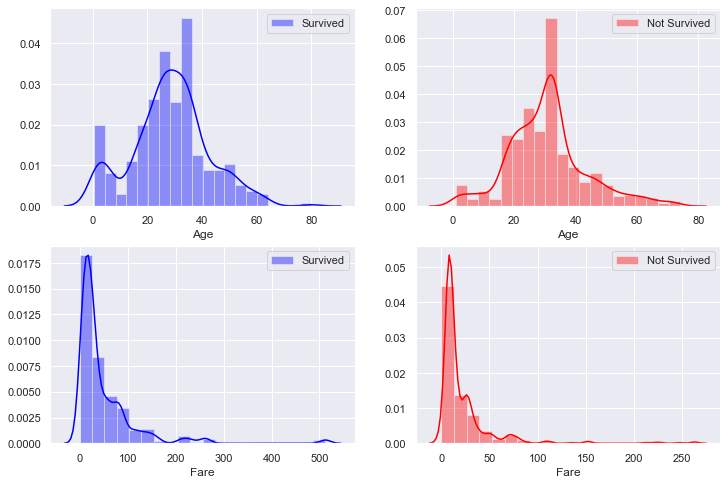

In [412]:
fig, ax = plt.subplots(2, 2, figsize = [12, 8])

survived_indices = (training_data['Survived'] == 1)


sns.distplot(a = training_data[survived_indices]['Age'], bins = 20, ax = ax[0,0], label = 'Survived', color = 'blue')
ax[0,0].legend()
sns.distplot(a = training_data[~survived_indices]['Age'], bins = 20, ax = ax[0,1], label = 'Not Survived', color='red')
ax[0,1].legend()

sns.distplot(a = training_data[survived_indices]['Fare'], bins = 20, ax = ax[1,0], label = 'Survived', color = 'blue')
ax[1, 0].legend()
sns.distplot(a = training_data[~survived_indices]['Fare'], bins = 20, ax = ax[1,1], label = 'Not Survived', color='red')
ax[1, 1].legend()

plt.show()

In [413]:
hist, bin_edges = np.histogram(a = training_data['Age'], bins = 20)

**Observations**  

- Children younger than 15 years has a high survival rate than any other age group. 
- There is a high proportion of people in age range of 20 - 40 in the ship and has low survival rate. 
- Fare distribution has a positive skew due to extremely large outliers.

#### Categorical Features

In [414]:
training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Deck'],
      dtype='object')

There are few categorical features in our dataset. Those are: Pclass, Sex, SibSp, Parch, Embarked, Title and Deck. Let us see how the distribution of the survived/non-survived in those classes.

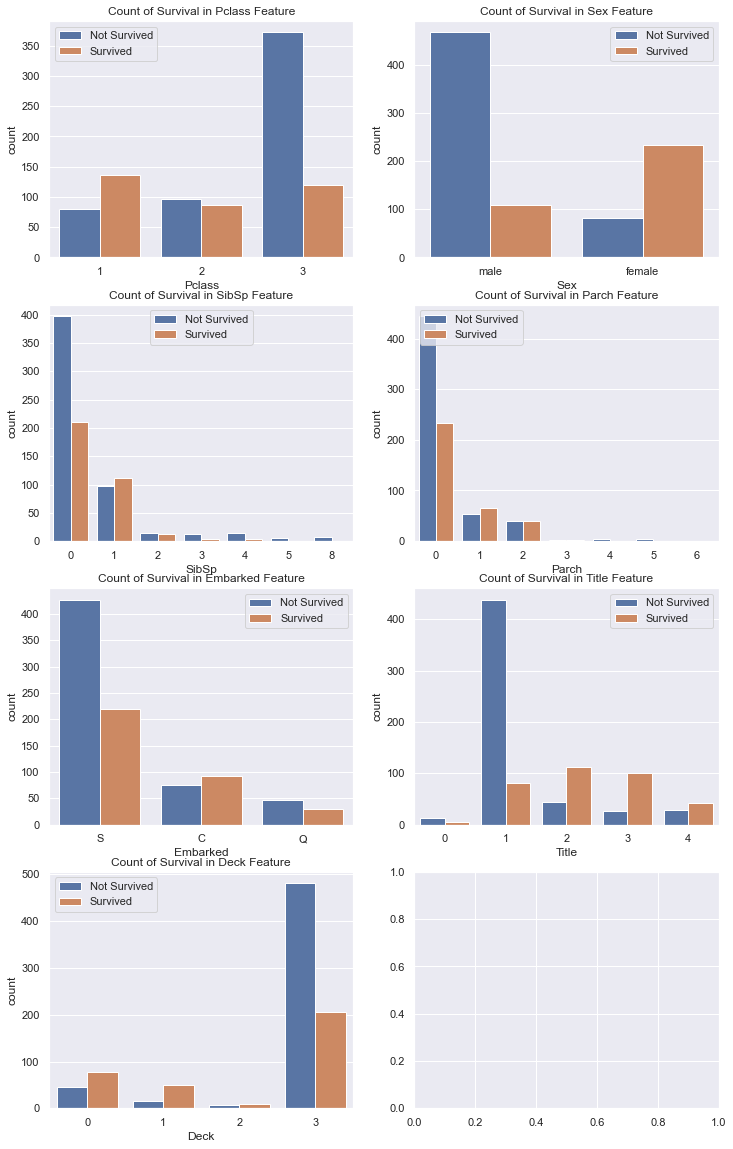

In [415]:
fig, ax = plt.subplots(4, 2, figsize = [12, 20])

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Deck']

for i, feature in enumerate(features, start=1):
    plt.subplot(4, 2, i)
    sns.countplot(x = feature, data=training_data, hue = 'Survived')
    plt.legend(['Not Survived', 'Survived'])
    plt.title('Count of Survival in {} Feature'.format(feature))

### Feature Engineering

#### Binning Continuous Features

In [416]:
training_data['Fare_binned'], bins = pd.qcut(training_data['Fare'], q = 13, retbins=True)
training_data['Fare_binned'].value_counts()

(7.75, 7.896]        83
(8.05, 10.5]         78
(24.0, 26.55]        73
(33.308, 55.9]       70
(7.229, 7.75]        70
(-0.001, 7.229]      70
(83.158, 512.329]    68
(55.9, 83.158]       68
(15.85, 24.0]        67
(10.5, 13.0]         65
(26.55, 33.308]      63
(7.896, 8.05]        62
(13.0, 15.85]        54
Name: Fare_binned, dtype: int64

In [417]:
bins[0] = -0.001

In [418]:
# Now we try to assign the same bins to the test dataset
test_data['Fare_binned'] = pd.cut(test_data['Fare'], bins = bins)
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  Deck  \
0  34.5      0      0   330911   7.8292   NaN        Q      1     3   
1  47.0      1      0   363272   7.0000   NaN        S      3     3   
2  62.0      0      0   240276   9.6875   NaN        Q      1     3   
3  27.0      0      0   315154   8.6625   NaN        S      1     3   
4  22.0      1      1  3101298  12.2875   NaN        S      3     3   

       Fare_binned  
0    (7.75, 7.896]  
1  (-0.001, 7.229]  
2     (8.05, 10.5]  
3     (8.05, 10.5]  
4     (10.5, 13.0]

In [419]:
set(test_data['Fare_binned']) - set(training_data['Fare_binned'])

set()

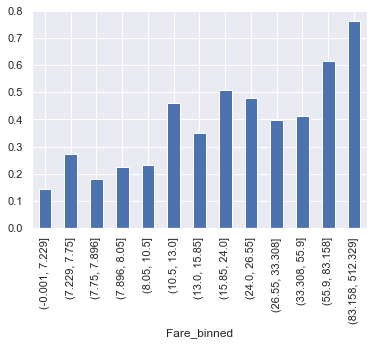

In [420]:
training_data.groupby(by='Fare_binned').mean()['Survived'].plot(kind = 'bar')

In [421]:
training_data['Age_binned'], bins  = pd.qcut(training_data['Age'], q = 10, retbins=True)
training_data['Age_binned'].value_counts()

(30.0, 32.401]    156
(0.419, 16.0]     104
(20.0, 24.0]       98
(26.421, 30.0]     90
(47.0, 80.0]       89
(38.0, 47.0]       89
(16.0, 20.0]       79
(24.0, 26.421]     78
(34.0, 38.0]       76
(32.401, 34.0]     32
Name: Age_binned, dtype: int64

Looking at the bin separations, lowest bin, (0.34, 8.378] and highest bin, (72.042, 80.0] needs re-adjustments. Because, test data might contains values either higher/lower than those limits.

In [422]:
smallest_age_bin = training_data['Age_binned'].unique().min()
largest_age_bin = training_data['Age_binned'].unique().max()

smallest_age = smallest_age_bin.left
largest_age = largest_age_bin.right

categories = training_data['Age_binned'].unique()

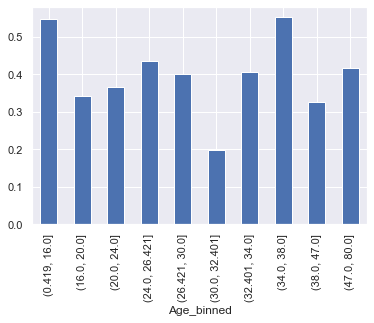

In [423]:
training_data.groupby(by ='Age_binned').mean()['Survived'].plot(kind = 'bar')

In [424]:
# Now we try to assign the same bins to the test dataset
bins[0] =0.419
test_data['Age_binned'] = pd.cut(test_data['Age'], bins = bins)
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  Deck  \
0  34.5      0      0   330911   7.8292   NaN        Q      1     3   
1  47.0      1      0   363272   7.0000   NaN        S      3     3   
2  62.0      0      0   240276   9.6875   NaN        Q      1     3   
3  27.0      0      0   315154   8.6625   NaN        S      1     3   
4  22.0      1      1  3101298  12.2875   NaN        S      3     3   

       Fare_binned      Age_binned  
0    (7.75, 7.896]    (34.0, 38.0]  
1  (-0.001, 7.229]    (38.0, 47.0]  
2     (8.05, 10.5]    (47.0, 80.0]  
3     (8.05, 10.5]  (26.421, 30.0]  
4     (10.5, 13.0]    (20.0, 24.0]

In [425]:
# Let's now see whether there are any ages that were not assigned to correct bin, due to they having value range outside
# min/max ages in the bins that we created from the training dataset.
test_data[test_data['Age_binned'].isnull()]

PassengerId  Pclass                                     Name     Sex  \
201         1093       3  Danbom, Master. Gilbert Sigvard Emanuel    male   
354         1246       3  Dean, Miss. Elizabeth Gladys Millvina""  female   

      Age  SibSp  Parch     Ticket    Fare Cabin Embarked  Title  Deck  \
201  0.33      0      2     347080  14.400   NaN        S      4     3   
354  0.17      1      2  C.A. 2315  20.575   NaN        S      4     3   

       Fare_binned Age_binned  
201  (13.0, 15.85]        NaN  
354  (15.85, 24.0]        NaN

In [426]:
test_data['Age_binned'].value_counts()

(32.401, 34.0]    66
(20.0, 24.0]      62
(26.421, 30.0]    46
(38.0, 47.0]      45
(47.0, 80.0]      44
(24.0, 26.421]    38
(0.419, 16.0]     36
(16.0, 20.0]      35
(34.0, 38.0]      32
(30.0, 32.401]    12
Name: Age_binned, dtype: int64

In [427]:
training_data['Age_binned'].value_counts()

(30.0, 32.401]    156
(0.419, 16.0]     104
(20.0, 24.0]       98
(26.421, 30.0]     90
(47.0, 80.0]       89
(38.0, 47.0]       89
(16.0, 20.0]       79
(24.0, 26.421]     78
(34.0, 38.0]       76
(32.401, 34.0]     32
Name: Age_binned, dtype: int64

In [428]:
smallest_age_bin

Interval(0.419, 16.0, closed='right')

In [429]:
# Looking at 'Age' column we can see that those records having Age lower than the minimum Age bin interval. So, we manually 
# assign the bins for those two records.
test_data.loc[test_data['Age_binned'].isnull(), 'Age_binned'] = smallest_age_bin

In [430]:
test_data[test_data['Age_binned'].isnull()]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Deck, Fare_binned, Age_binned]
Index: []

#### Family Size

In [431]:
# We combine Parch & SipSp columns together to get family size column. 
for dataset in combined_df:
    # adding one to count the person himself, so family count = 1
    dataset['Family_Size'] = dataset['Parch'] + dataset['SibSp'] + 1 
    

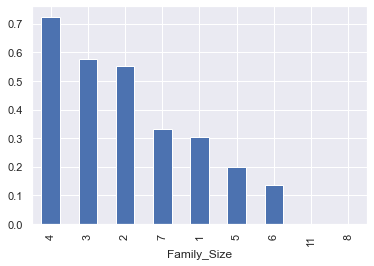

In [432]:
training_data.groupby(by = 'Family_Size').mean()['Survived'].sort_values(ascending = False).plot(kind = 'bar')

In [433]:
training_data['Family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

In [434]:
# Looking at the survival rate for each family size, we group them into following categories.

# 1 = Alone
# 2, 3 and 4 = 'Small'
# 5, 6 and 7 = 'Medium'
# 8 and 11 = 'Large'

for dataset in combined_df:
    dataset.loc[(dataset['Family_Size'] == 1), 'Family_Size'] = 'Alone'
    dataset.loc[(dataset['Family_Size'] == 2) | 
                (dataset['Family_Size'] == 3) | 
                (dataset['Family_Size'] == 4), 
                'Family_Size'] = 'Small'
    dataset.loc[(dataset['Family_Size'] == 5) | 
                (dataset['Family_Size'] == 6) | 
                (dataset['Family_Size'] == 7), 
                'Family_Size'] = 'Medium'
    dataset.loc[(dataset['Family_Size'] == 8) | 
                (dataset['Family_Size'] == 11),  
                'Family_Size'] = 'Large'

In [435]:
training_data['Family_Size'].value_counts()

Alone     537
Small     292
Medium     49
Large      13
Name: Family_Size, dtype: int64

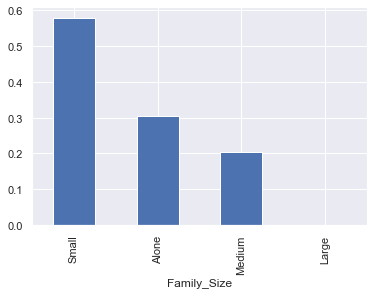

In [436]:
training_data.groupby(by = 'Family_Size').mean()['Survived'].sort_values(ascending = False).plot(kind = 'bar')

### Label Encoding 

In this step, I will encode all categorical data into numerical values, so that it can be intepreted by the machine learning algorithms. 

In [437]:
training_data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Title             int64
Deck              int32
Fare_binned    category
Age_binned     category
Family_Size      object
dtype: object

Following features are categorical and need to be converted to numerical type with Label Encoder. 

In [438]:
categorical_features = ['Sex', 'Embarked', 'Family_Size', 'Fare_binned', 'Age_binned']

for feature in categorical_features:
    encoder = LabelEncoder()
    training_data[feature] = encoder.fit_transform(training_data[feature])
    test_data[feature] = encoder.transform(test_data[feature])

In [439]:
def get_value_counts(dataset, feature):
    return dataset[feature].value_counts()

In [440]:
get_value_counts(training_data, 'Age_binned')

5    156
0    104
2     98
4     90
9     89
8     89
1     79
3     78
7     76
6     32
Name: Age_binned, dtype: int64

In [441]:
get_value_counts(test_data, 'Age_binned')

6    66
2    62
4    46
8    45
9    44
3    38
0    38
1    35
7    32
5    12
Name: Age_binned, dtype: int64

### One Hot Encoding for Categorical Variables 

Following categorical features need to be one-hot encoded to avoid confusing the ML model due to ordinal values.

* Pclass
* Embarked
* Deck
* Family_Size

Age_binned and Fare_binned does not need to be converted as they are ordinal unlike previous ones.

In [442]:
training_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Title  Deck  Fare_binned  \
0         A/5 21171   7.2500   NaN         2      1     3            1   
1          PC 17599  71.2833   C85         0      3     0           11   
2  STON/O2. 3101282   7.9250   NaN         2      2     3            3   
3            113803  53.1000  C123         2      3     0           10   
4            373450   8.0500   NaN         2      1     3            3   

   Age_binned  Family_Size  
0           2            3  
1           7            3  
2           3            0  
3           7            3  
4           7            0

In [443]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Pclass', 'Embarked', 'Deck', 'Family_Size']

for feature in categorical_features:
    ohe = OneHotEncoder()

    # transformation to the training dataset
    transformed_set = ohe.fit_transform(training_data[feature].values.reshape(-1,1)).toarray()
    cols = [f'{feature}_{element}' for element in training_data[feature].unique()]
    transformed_df = pd.DataFrame(data = transformed_set, columns=cols)
    training_data = pd.concat([training_data, transformed_df], axis = 1)

    # same transformation to be done for the test dataset
    transformed_set = ohe.transform(test_data[feature].values.reshape(-1,1)).toarray()
    transformed_df = pd.DataFrame(data = transformed_set, columns=cols)
    test_data = pd.concat([test_data, transformed_df], axis = 1)

    # drop original columns
    training_data.drop(columns=feature, inplace=True)
    test_data.drop(columns=feature, inplace=True)

In [444]:
training_data.head()

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  ...  Embarked_0  \
0    1  22.0      1      0         A/5 21171   7.2500   NaN  ...         0.0   
1    0  38.0      1      0          PC 17599  71.2833   C85  ...         0.0   
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN  ...         0.0   
3    0  35.0      1      0            113803  53.1000  C123  ...         0.0   
4    1  35.0      0      0            373450   8.0500   NaN  ...         0.0   

   Embarked_1  Deck_3  Deck_0  Deck_1  Deck_2  Family_Size_3  Family_Size_0  \
0         1.0     0.0     0.0     0.0     1.0            0.0            0.0   
1         0.0     1.0     0.0     0.0     0.0            0.0            0.0   
2         1.0     0.0     0.0     0.0     1.0            1.0            0.0   
3         1.0     1.0     0.0     0.0     0.0            0.0            0.0   
4         1.0     0.0     0.0     0.0     1.0            1.0            0.0   

   Family_Size_2  Family_Size_1  
0            0.0            1.0  
1            0.0            1.0  
2            0.0            0.0  
3            0.0            1.0  
4            0.0            0.0  

[5 rows x 27 columns]

### Dropping Unwanted columns

In [445]:
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'SibSp', 'Parch', 'Age', 'Fare', 'Title']
training_data.drop(columns = columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [446]:
def bar_graph(feature):
    survived = training_data.loc[(training_data['Survived'] == 1), feature].value_counts()
    dead = training_data.loc[(training_data['Survived'] == 0), feature].value_counts()
    
    # create a dataframe
    df = pd.DataFrame(data=[survived, dead], index=['Survived', 'Not Survived'])
    plt = df.plot(kind = 'bar', stacked = True, figsize = [5, 3], rot = 0)
    
    return plt   



## Data Prep for Model Imports

In [447]:
y_train = training_data['Survived']
X_train = training_data.iloc[:, 2:]
X_test = test_data.iloc[:, 1:]

X_train.head()

Sex   Age  Fare_binned  Pclass_3  Pclass_1  Pclass_2  Embarked_2  \
0    1  22.0            1       0.0       0.0       1.0         0.0   
1    0  38.0           11       1.0       0.0       0.0         1.0   
2    0  26.0            3       0.0       0.0       1.0         0.0   
3    0  35.0           10       1.0       0.0       0.0         0.0   
4    1  35.0            3       0.0       0.0       1.0         0.0   

   Embarked_0  Embarked_1  Deck_3  Deck_0  Deck_1  Deck_2  Family_Size_3  \
0         0.0         1.0     0.0     0.0     0.0     1.0            0.0   
1         0.0         0.0     1.0     0.0     0.0     0.0            0.0   
2         0.0         1.0     0.0     0.0     0.0     1.0            1.0   
3         0.0         1.0     1.0     0.0     0.0     0.0            0.0   
4         0.0         1.0     0.0     0.0     0.0     1.0            1.0   

   Family_Size_0  Family_Size_2  Family_Size_1  
0            0.0            0.0            1.0  
1            0.0            0.0            1.0  
2            0.0            0.0            0.0  
3            0.0            0.0            1.0  
4            0.0            0.0            0.0

## Initial Modeling 

In [450]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

cross_val_score(single_best_model, X = X_train, y = y_train, cv = 10, n_jobs=-1, scoring = 'accuracy').mean()

0.8238077403245943

## Generating Output Values 

In [451]:
# Pick the final model to produce the output required for the Kaggle competition

single_best_model.fit(X_train, y_train)
y_pred = single_best_model.predict(X_test)

pid = test_data['PassengerId']
result_frame = pd.DataFrame(data={'PassengerID': pid, 'Survived': y_pred})
result_frame.to_csv('test.csv', index = False)

result_frame.head()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


PassengerID  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0